In [64]:
%run "Anomaly Generation.ipynb"
%run "Cell Generation.ipynb"

In [93]:
placeholder = {
    'education_1_df': 'Datasets/student-grading.csv',
    'education_2_df': 'Datasets/predict-dropout-or-academic-success.csv',
    'education_3_df': 'Datasets/student-lifestyle.csv',
    'finance_1_df': 'Datasets/bank-customer-churn-prediction.csv',
    'finance_2_df': 'Datasets/financial-risk-for-loan-approval.csv',
    'finance_3_df': 'Datasets/loan-approval-classification-dataset.csv',
    'health_1_df': 'Datasets/fetal-health-classifiation.csv',
    'health_2_df': 'Datasets/air-quality-health-impact.csv',
    'health_3_df': 'Datasets/patient-treatment-classification.csv'
}

anomalous_placeholder = {
    'a_education_1_df': 'Datasets/student-grading_anomaly.csv',
    'a_education_2_df': 'Datasets/predict-dropout-or-academic-success_anomaly.csv',
    'a_education_3_df': 'Datasets/student-lifestyle_anomaly.csv',
    'a_finance_1_df': 'Datasets/bank-customer-churn-prediction_anomaly.csv',
    'a_finance_2_df': 'Datasets/financial-risk-for-loan-approval_anomaly.csv',
    'a_finance_3_df': 'Datasets/loan-approval-classification-dataset_anomaly.csv',
    'a_health_1_df': 'Datasets/fetal-health-classifiation_anomaly.csv',
    'a_health_2_df': 'Datasets/air-quality-health-impact_anomaly.csv',
    'a_health_3_df': 'Datasets/patient-treatment-classification_anomaly.csv'
}

In [94]:
datasets = {
    'finance_1_df': 'Datasets/bank-customer-churn-prediction.csv',
}

anomalous_datasets = {
    'a_finance_1_df': 'Datasets/bank-customer-churn-prediction_anomaly.csv',
}

In [95]:
import time
speed_list = [3,4,5,6,7,8,9,10]
def run_everything(rows=0.2, point=0.1, contextual=0.1, threshold=0.61, nu=0.999, eps=1, speed=30, nrows=2500, graphs=False):
    print("Classifying Original Dataset")
    classify_datasets(nrows=nrows)
    true_set = run_inject(rows, point, contextual, nrows=nrows)
    print("\nClassifying Dataset With Anomalies Injected")
    classify_anomalous(nrows, graphs=graphs)
    if graphs == True:
        print("\nDisplaying Confusion Matrix and ROC curve for Dataset Containing Anomalies")
    start_time = time.time()
    print("\nUsing DBSCAN...")
    run_dbscan(eps=eps, speed=speed, nrows=nrows)
    print("\nUsing One-Class SVM...")
    run_ocsvm(nu=nu, gamma=0.99, speed=speed, nrows=nrows)
    print("\nUsing Isolation Forest...")
    run_isolation_forest(threshold=threshold, speed=speed, nrows=nrows)
    end_time = time.time()
    print("\nClassifying Dataset With Anomalies Deleted")
    detected_set = classify_anomalous(nrows=nrows)
    print("\nClassifying Dataset With Cell Values Generated")
    generate_cell_values(nrows=nrows, graphs=graphs)
    if graphs == True:
        print("\nDisplaying Confusion Matrix and ROC curve for Dataset Containing Anomalies")
    print(f"Execution Time of All Datasets: {end_time - start_time:.2f} seconds")


    final_statement=False
    
    for i in range(0, 1):
        #Convert lists to sets before using intersection
        correctly_detected = set(detected_set[i]).intersection(set(true_set[i]))

        # Calculate percentage
        if len(true_set[i]) == 0:
            print(f"Set {i}: No true anomalies, accuracy = 0%")
            continue  # Skip to next iteration

        total_accuracy_percentage = (len(correctly_detected) / len(true_set[i])) * 100


    for i in range(0, 1):
        indices1 = {tup[0] for tup in detected_set[i]}
        indices2 = {tup[0] for tup in true_set[i]}
    
        # Find the intersection (common indices)
        common_indices = set(indices1).intersection(set(indices2))
    
        accuracy_percentage = (len(common_indices) / len(indices2)) * 100
        if len(indices1) >= len(indices2):
            final_statement=True
            accuracy_percentage_2 = (len(common_indices) / len(indices1)) * 100
        else:
            accuracy_percentage_2 = None

    print("")
    print(f'Anomalies Detected: {len(detected_set[i])}')
    print(f'Anomalies Created: {len(true_set[i])}')
    print(f'Exact Cell Detected: {total_accuracy_percentage:.2f}%')
    print(f'Row Contained: {accuracy_percentage:.2f}%')
    print(f'Exact Row Detected: {accuracy_percentage_2:.2f}%')

In [96]:
import ocsvm
run_everything(0.3, 0.4, 0.4, nu=1.0, eps=0.42, threshold=0.99, nrows=1000)

Classifying Original Dataset
Accuracy: 0.74
Accuracy Whole: 0.74

Classifying Dataset With Anomalies Injected
Accuracy: 0.71
Accuracy Whole: 0.71

Using DBSCAN...
Accuracy: 0.747
Accuracy Whole: 0.368
Total time taken: 0.42 seconds

Using One-Class SVM...
Accuracy: 0.747
Accuracy Whole: 0.368
Total time taken: 0.71 seconds

Using Isolation Forest...
Accuracy: 0.747
Accuracy Whole: 0.368
Total time taken: 4.83 seconds

Classifying Dataset With Anomalies Deleted
Accuracy: 0.747
Accuracy Whole: 0.368

Classifying Dataset With Cell Values Generated
Accuracy: 0.8
Accuracy Whole: 0.8
Execution Time of All Datasets: 5.96 seconds

Anomalies Detected: 1281
Anomalies Created: 958
Exact Cell Detected: 52.09%
Row Contained: 76.00%
Exact Row Detected: 44.88%


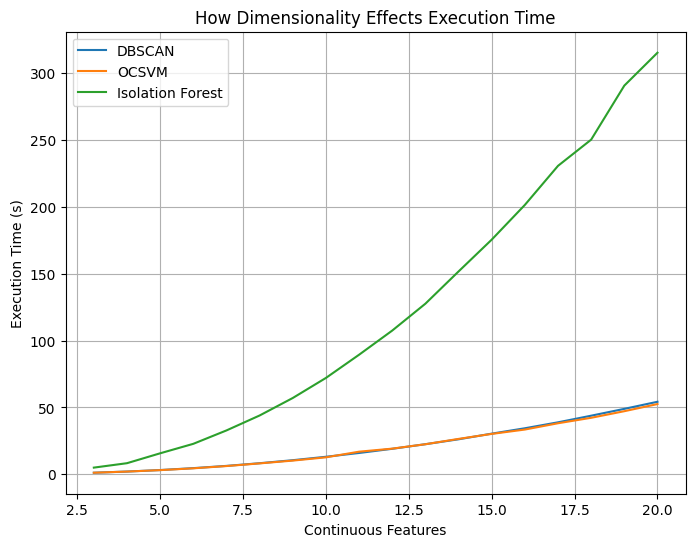

In [92]:
import matplotlib.pyplot as plt


x = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
dbscan = [1.13,1.99,3.12,4.55,6.23,8.23,10.49,13.05,15.89,19.02,22.46,26.13,30.36,34.38,38.83,43.79,48.90,54.21]
ocsvm = [1.12,1.98,3.06,4.42,6.11,8.10,10.19,12.64,16.86,19.14,22.43,26.42,30.16,33.42,38.13,42.22,47.15,52.49]
isolation_forest = [4.94,8.25,15.65,22.74,32.76,43.94,57.03,72.04,89.40,107.48,127.59,151.70,175.50,201.49,230.73,250.34,290.76,315.37]


plt.figure(figsize=(8, 6))

# Create the plot
plt.plot(x, dbscan, label='DBSCAN')
plt.plot(x, ocsvm, label='OCSVM')
plt.plot(x, isolation_forest, label='Isolation Forest')


# Add labels and title
plt.xlabel('Continuous Features')
plt.ylabel('Execution Time (s)')
plt.title('How Dimensionality Effects Execution Time')

# Add a legend
plt.legend()

plt.grid(True)
plt.show()


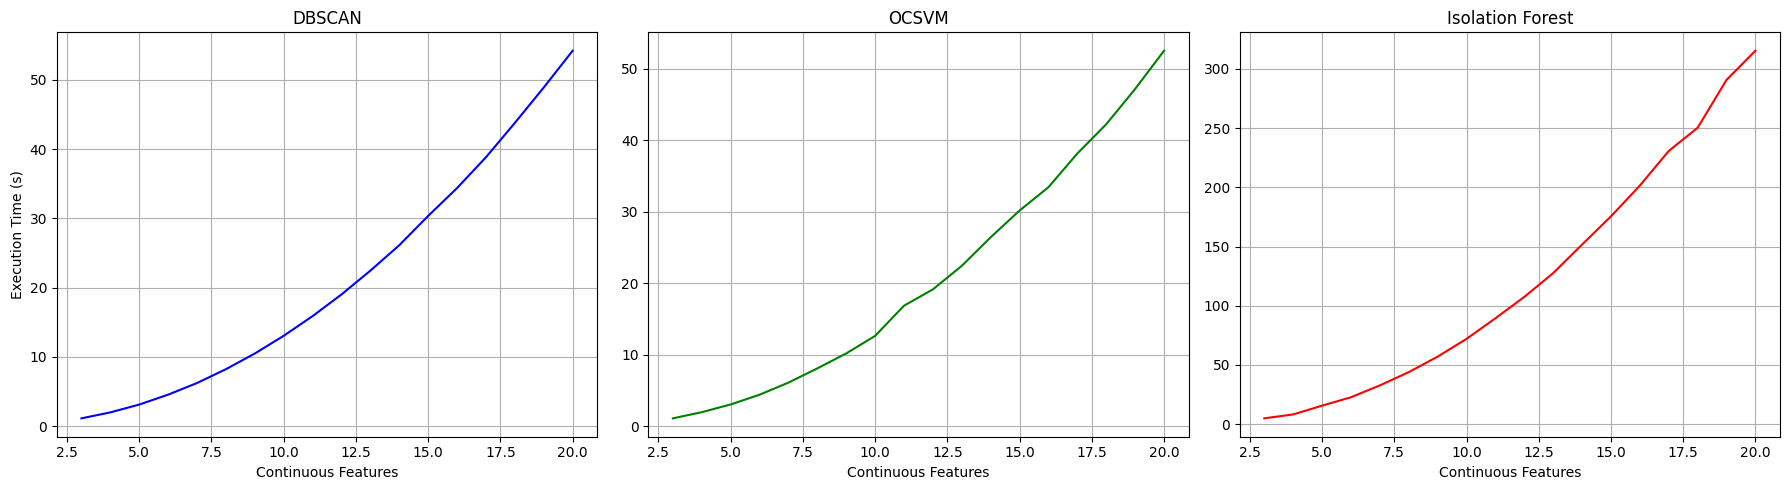

In [75]:
x = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
dbscan = [1.13,1.99,3.12,4.55,6.23,8.23,10.49,13.05,15.89,19.02,22.46,26.13,30.36,34.38,38.83,43.79,48.90,54.21]
ocsvm = [1.12,1.98,3.06,4.42,6.11,8.10,10.19,12.64,16.86,19.14,22.43,26.42,30.16,33.42,38.13,42.22,47.15,52.49]
isolation_forest = [4.94,8.25,15.65,22.74,32.76,43.94,57.03,72.04,89.40,107.48,127.59,151.70,175.50,201.49,230.73,250.34,290.76,315.37]

# Create a figure and 3 subplots on one row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # (rows, columns), make it wider

# Plot each on a different subplot
axes[0].plot(x, dbscan, color='blue')
axes[0].set_title('DBSCAN')
axes[0].set_xlabel('Continuous Features')
axes[0].set_ylabel('Execution Time (s)')
axes[0].grid(True)

axes[1].plot(x, ocsvm, color='green')
axes[1].set_title('OCSVM')
axes[1].set_xlabel('Continuous Features')
axes[1].grid(True)

axes[2].plot(x, isolation_forest, color='red')
axes[2].set_title('Isolation Forest')
axes[2].set_xlabel('Continuous Features')
axes[2].grid(True)

# Make layout nicer
plt.tight_layout()
plt.show()


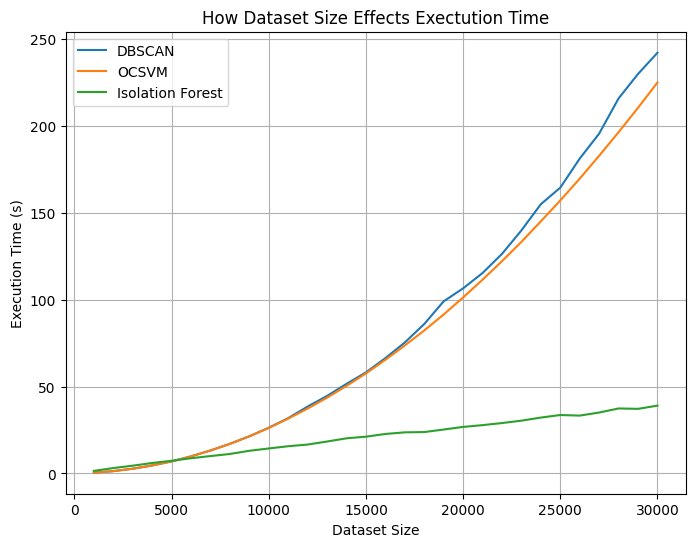

In [3]:


x = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000,
     11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000,
     21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000]

dbscan = [0.52, 1.36, 2.74, 4.61, 6.95, 9.85, 13.22, 17.07, 21.39, 26.32, 
          31.84, 38.52, 44.64, 51.59, 58.18, 66.40, 75.38, 86.02, 99.10, 106.55, 
          115.38, 126.38, 139.91, 154.99, 164.53, 181.25, 195.63, 215.90, 229.96, 242.17]

ocsvm = [0.44, 1.34, 2.74, 4.60, 6.96, 9.86, 13.21, 17.05, 21.40, 26.20, 
         31.56, 37.35, 43.62, 50.40, 57.58, 65.43, 73.67, 82.32, 91.52, 101.31, 
         111.54, 122.18, 133.31, 145.14, 157.14, 169.70, 182.88, 196.46, 210.49, 225.06]

isolation_forest = [1.49, 3.12, 4.49, 6.04, 7.31, 8.78, 10.03, 11.23, 13.06, 14.40, 
                    15.69, 16.66, 18.40, 20.24, 21.19, 22.75, 23.68, 23.84, 25.30, 26.80, 
                    27.83, 29.03, 30.40, 32.18, 33.65, 33.32, 35.08, 37.43, 37.20, 39.06]

plt.figure(figsize=(8, 6))

# Create the plot
plt.plot(x, dbscan, label='DBSCAN')
plt.plot(x, ocsvm, label='OCSVM')
plt.plot(x, isolation_forest, label='Isolation Forest')


# Add labels and title
plt.xlabel('Dataset Size')
plt.ylabel('Execution Time (s)')
plt.title('How Dataset Size Effects Exectution Time')

# Add a legend
plt.legend()

plt.grid(True)
plt.show()


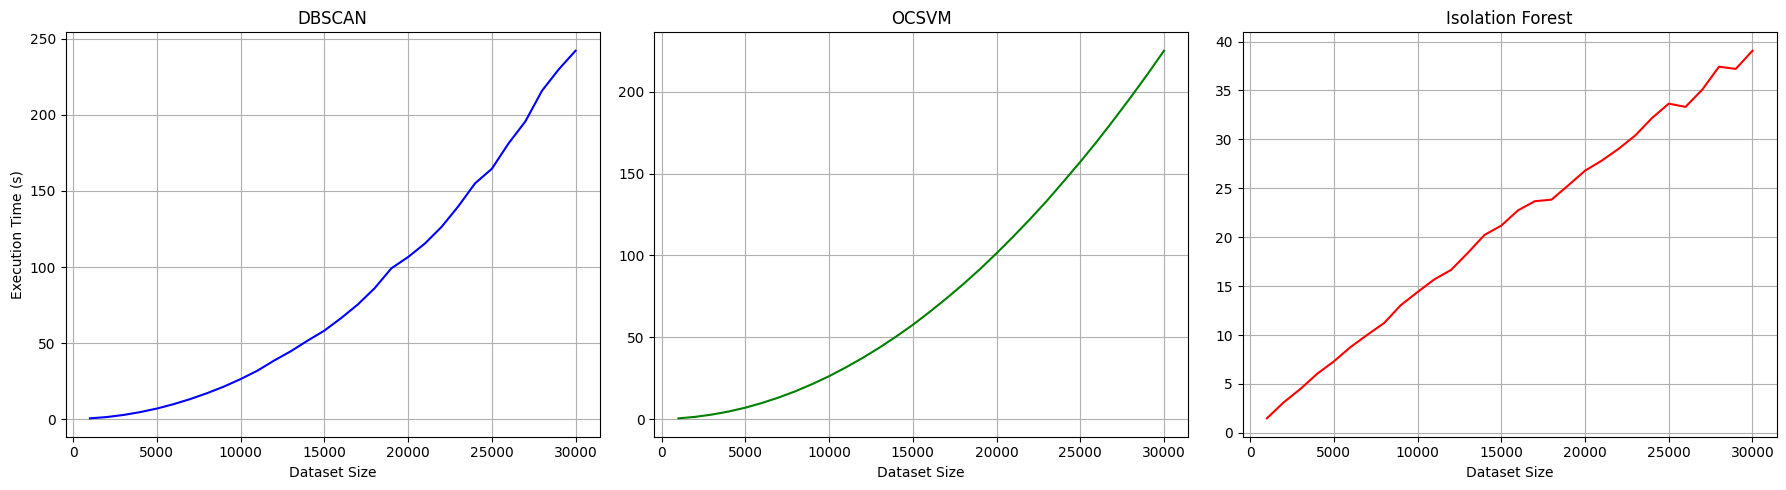

In [71]:
import matplotlib.pyplot as plt

x = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000,
     11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000,
     21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000]

dbscan = [0.52, 1.36, 2.74, 4.61, 6.95, 9.85, 13.22, 17.07, 21.39, 26.32, 
          31.84, 38.52, 44.64, 51.59, 58.18, 66.40, 75.38, 86.02, 99.10, 106.55, 
          115.38, 126.38, 139.91, 154.99, 164.53, 181.25, 195.63, 215.90, 229.96, 242.17]

ocsvm = [0.44, 1.34, 2.74, 4.60, 6.96, 9.86, 13.21, 17.05, 21.40, 26.20, 
         31.56, 37.35, 43.62, 50.40, 57.58, 65.43, 73.67, 82.32, 91.52, 101.31, 
         111.54, 122.18, 133.31, 145.14, 157.14, 169.70, 182.88, 196.46, 210.49, 225.06]

isolation_forest = [1.49, 3.12, 4.49, 6.04, 7.31, 8.78, 10.03, 11.23, 13.06, 14.40, 
                    15.69, 16.66, 18.40, 20.24, 21.19, 22.75, 23.68, 23.84, 25.30, 26.80, 
                    27.83, 29.03, 30.40, 32.18, 33.65, 33.32, 35.08, 37.43, 37.20, 39.06]


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(x, dbscan, color='blue')
axes[0].set_title('DBSCAN')
axes[0].set_xlabel('Dataset Size')
axes[0].set_ylabel('Execution Time (s)')
axes[0].grid(True)

axes[1].plot(x, ocsvm, color='green')
axes[1].set_title('OCSVM')
axes[1].set_xlabel('Dataset Size')
axes[1].grid(True)

axes[2].plot(x, isolation_forest, color='red')
axes[2].set_title('Isolation Forest')
axes[2].set_xlabel('Dataset Size')
axes[2].grid(True)

# Improve layout
plt.tight_layout()
plt.show()


In [ ]:
# Finance Dataset 1 Results
# anomaly_percent - Anomalies Detected - Anomalies present - Total % - Row contained % - row exact % 
# acc set - acc with anomalies - acc anomalies deleted - acc deleted from whole dataset - acc cells generated


# 1000 Data Entries
#run_everything(0.1, 0.4, 0.4, nu=0.988, eps=1.6, threshold=0.68, speed=i)
# 8 & 298 & 318 & 13.84 & 23.00 & 17.83
# 74.0 & 72.5 & 76.6 & 66.7 & 76.5
#run_everything(0.2, 0.4, 0.4, nu=0.98, eps=1.2, threshold=0.62, speed=i)
# 16 & 628 & 638 & 20.69 & 35.50 & 26.01
# 74.0 & 74.5 & 78.1 & 56.8 & 77.5
#run_everything(0.3, 0.4, 0.4, nu=0.963, eps=0.9, threshold=0.59, speed=i)
# 24 & 976 & 958 & 28.60 & 44.15 & 33.08
# 74.0 & 71.0 & 78.5 & 47.2 & 79.5

# 2500 Data Entries
#run_everything(0.1, 0.4, 0.4, nu=0.989, eps=1.3, threshold=0.65, speed=i)
# 8 & 806 & 798 & 15.04 & 24.10 & 16.76
# 78.8 & 79.4 & 75.9 & 65.1 & 79.6
#run_everything(0.2, 0.4, 0.4, nu=0.98, eps=0.81, threshold=0.608, speed=i)
# 16 & 1577 & 1598 & 21.65 & 36.20 & 26.23
# 78.8 & 78.6 & 73.2 & 53.0 & 81.2
#run_everything(0.3, 0.4, 0.4, nu=0.961, eps=0.58, threshold=0.58, speed=i)
# 24 & 2377 & 2398 & 30.36 & 47.12 & 35.63
# 78.8 & 79.8 & 76.9 & 46.5 & 81.2

# 5000 Data Entries
#run_everything(0.1, 0.4, 0.4, nu=0.989, eps=1.0, threshold=0.635, speed=i)
# 8 & 1575 & 1598 & 13.83 & 23.45 & 16.60
# 76.5 & 75.0 & 76.7 & 65.9 & 77.9
#run_everything(0.2, 0.4, 0.4, nu=0.977, eps=0.64, threshold=0.593, speed=i)
# 16 & 3249 & 3198 & 22.23 & 36.01 & 25.37
# 76.5 & 76.5 & 78.2 & 56.1 & 78.5
#run_everything(0.3, 0.4, 0.4, nu=0.964, eps=0.42, threshold=0.57, speed=i)
# 24 & 4727 & 4798 & 29.39 & 45.86 & 34.86
# 76.5 & 75.6 & 80.0 & 48.5 & 80.2


In [164]:
#### Finance Dataset 2 Results


# 1000 Data entries
# run_everything(0.1, 0.4, 0.4, nu=0.998, eps=3.2, threshold=0.72, speed=i)
# 8 & 1660 & 1598 & 12.64 & 71.00 & 14.92
# 96.0 & 95.5 & 98.1 & 51.4 & 94.5
#run_everything(0.2, 0.4, 0.4, nu=0.995, eps=2.3, threshold=0.69, speed=i)
# 16 & 3053 & 3198 & 17.07 & 74.00 & 22.22
# 96.0 & 91.5 & 94.0 & 31.4 & 91.0
#run_everything(0.3, 0.4, 0.4, nu=0.994, eps=1.6, threshold=0.65, speed=i)
# 24 & 4961 & 4798 & 29.10 & 90.67 & 32.30
# 96.0 & 88.5 & 93.8 & 14.8 & 89.0

In [165]:
#### Finance Dataset 3 Results

# 1000 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.991, eps=1.5, threshold=0.68, speed=i)
# 8 & 402 & 398 & 21.36 & 43.43 & 23.24
# 90.0 & 87.5 & 83.4 & 68.0 & 88.0
#run_everything(0.2, 0.4, 0.4, nu=0.982, eps=1.13, threshold=0.627, speed=i)
# 16 & 796 & 798 & 26.44 & 47.50 & 28.44
# 90.0 & 86.5 & 89.6 & 59.6 & 86.0
#run_everything(0.3, 0.4, 0.4, nu=0.975, eps=0.82, threshold=0.605, speed=i)
# 24 & 1114 & 1198 & 30.22 & 57.67 & 37.86
# 90.0 & 82.5 & 86.2 & 46.8 & 81.5

# 2500 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.99, eps=1.25, threshold=0.66, speed=i)
# 8 & 1044 & 998 & 17.84 & 36.00 & 19.03
# 87.0 & 82.6 & 82.0 & 66.5 & 83.0
#run_everything(0.2, 0.4, 0.4, nu=0.98, eps=0.78, threshold=0.617, speed=i)
# 16 & 2047 & 1998 & 26.48 & 51.40 & 29.27
# 87.0 & 80.2 & 80.0 & 51.9 & 80.4
#run_everything(0.3, 0.4, 0.4, nu=0.967, eps=0.63, threshold=0.585, speed=i)
# 24 & 3063 & 2998 & 32.05 & 58.13 & 34.85
# 87.0 & 80.2 & 80.8 & 40.4 & 80.6

# 5000 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.989, eps=0.8, threshold=0.647, speed=i)
# 8 & 1984 & 1998 & 20.22 & 39.60 & 22.35
# 86.1 & 84.1 & 85.4 & 70.3 & 84.3
#run_everything(0.2, 0.4, 0.4, nu=0.979, eps=0.56, threshold=0.602, speed=i)
# 16 & 4091 & 3998 & 24.21 & 46.80 & 26.58
# 86.1 & 83.5 & 82.7 & 53.6 & 82.5
#run_everything(0.3, 0.4, 0.4, nu=0.965, eps=0.45, threshold=0.576, speed=i)
# 24 & 5959 & 5998 & 31.51 & 57.60 & 36.12
# 86.1 & 80.2 & 83.0 & 43.3 & 80.7

In [166]:
#### Healthcare 1 Dataset Results

# 1000 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.996, eps=2.35, threshold=0.73, speed=i)
# 8 & 974 & 958 & 39.04 & 95.00 & 29.97
# 91.5 & 88.5 & 92.0 & 62.8 & 88.5
#run_everything(0.2, 0.4, 0.4, nu=0.993, eps=1.85, threshold=0.68, speed=i)
# 16 & 1970 & 1918 & 38.06 & 92.50 & 32.12
# 91.5 & 85.5 & 90.6 & 38.4 & 84.0
#run_everything(0.3, 0.4, 0.4, nu=0.989, eps=1.45, threshold=0.645, speed=i)
# 24 & 2953 & 2878 & 43.54 & 95.67 & 40.42
# 91.5 & 82.5 & 91.4 & 26.5 & 84.5

#run_everything(0.1, 0.4, 0.4, nu=0.997, eps=2.25, threshold=0.70, speed=i)
# 8 & 1948 & 2042 & 30.07 & 87.79 & 26.64
# 94.6 & 93.0 & 93.7 & 62.7 & 92.0
#run_everything(0.2, 0.4, 0.4, nu=0.992, eps=1.37, threshold=0.666, speed=i)
# 16 & 4156 & 4078 & 38.03 & 96.00 & 32.56
# 94.6 & 91.3 & 89.7 & 36.8 & 90.4
#run_everything(0.3, 0.4, 0.4, nu=0.989, eps=0.9, threshold=0.63, speed=i)
# 24 & 5967 & 6122 & 38.70 & 94.67 & 39.25
# 94.6 & 89.9 & 90.7 & 25.0 & 87.6


#Changed datatype setting

In [167]:
#### Healthcare 2 Dataset Results

# 1000 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.997, eps=1.83, threshold=0.72, speed=i)
# 8 & 788 & 798 & 27.07 & 77.00 & 25.25
# 99.0 & 95.5 & 97.8 & 68.0 & 95.5
#run_everything(0.2, 0.4, 0.4, nu=0.993, eps=1.35, threshold=0.677, speed=i)
# 16 & 1632 & 1598 & 32.54 & 82.00 & 30.04
# 99.0 & 97.0 & 96.7 & 43.9 & 94.5
#run_everything(0.3, 0.4, 0.4, nu=0.988, eps=1.06, threshold=0.645, speed=i)
# 24 & 2424 & 2398 & 41.33 & 89.33 & 40.79
# 99.0 & 94.0 & 98.6 & 33.8 & 93.0

# 2500 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.997, eps=1.49, threshold=0.7, speed=i)
# 8 & 2080 & 1998 & 33.48 & 83.20 & 26.60
# 99.6 & 97.8 & 99.4 & 68.3 & 98.2
#run_everything(0.2, 0.4, 0.4, nu=0.993, eps=0.934, threshold=0.659, speed=i)
# 16 & 3828 & 3998 & 36.37 & 89.60 & 34.28
# 99.6 & 97.6 & 97.9 & 46.7 & 97.2
#run_everything(0.3, 0.4, 0.4, nu=0.987, eps=0.702, threshold=0.626, speed=i)
# 24 & 6019 & 5998 & 44.26 & 92.93 & 41.94
# 99.6 & 95.6 & 99.4 & 33.3 & 95.0

# 4412 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.997, eps=1.12, threshold=0.685, speed=i)
# 8 & 4022 & 3998 & 33.22 & 85.20 & 28.08
# 100 & 98.1 & 99.1 & 69.1 & 98.1
#run_everything(0.2, 0.4, 0.4, nu=0.993, eps=0.645, threshold=0.643, speed=i)
# 16 & 7791 & 7998 & 39.82 & 90.20 & 35.96
# 100 & 97.2 & 98.8 & 49.2 & 97.3
#run_everything(0.3, 0.4, 0.4, nu=0.987, eps=0.49, threshold=0.614, speed=i)
# 24 & 11738 & 11998 & 46.36 & 94.60 & 44.29
# 100 & 96.1 & 99.7 & 35.8 & 95.9 

In [168]:
#### Healthcare 3 Dataset Results

# 1000 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.989, eps=1.5, threshold=0.69, speed=i)
# 8 & 603 & 638 & 26.80 & 72.00 & 28.80
# 81.5 & 80.0 & 81.3 & 61.0 & 80.5
# run_everything(0.2, 0.4, 0.4, nu=0.969, eps=1.04, threshold=0.65, speed=i)
# 16 & 1231 & 1278 & 32.94 & 81.00 & 34.54
# 81.5 & 78.0 & 79.4 & 42.2 & 80.5
#run_everything(0.3, 0.4, 0.4, nu=0.951, eps=0.79, threshold=0.62, speed=i)
# 24 & 1913 & 1918 & 39.16 & 92.33 & 43.08
# 81.5 & 78.5 & 80.6 & 28.8 & 78.5


# 2500 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.989, eps=1.2, threshold=0.68, speed=i)
# 8 & 1730 & 1798 & 29.87 & 80.00 & 29.59
# 75.2 & 73.4 & 77.0 & 56.2 & 77.2
#run_everything(0.2, 0.4, 0.4, nu=0.968, eps=0.75, threshold=0.64, speed=i)
# 16 & 3575 & 3598 & 34.10 & 90.20 & 34.75
# 75.2 & 74.0 & 78.0 & 37.5 & 72.0
#run_everything(0.3, 0.4, 0.4, nu=0.947, eps=0.56, threshold=0.61, speed=i)
# 24 & 5381 & 5398 & 39.22 & 94.13 & 41.82
# 75.2 & 72.2 & 79.8 & 25.9 & 75.2

# 4412 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.989, eps=0.98, threshold=0.662, speed=i)
# 8 & 3182 & 3174 & 26.56 & 77.78 & 26.69
# 75.7 & 73.4 & 76.8 & 54.5 & 73.3
#run_everything(0.2, 0.4, 0.4, nu=0.964, eps=0.69, threshold=0.625, speed=i)
# 16 & 6491 & 6348 & 35.14 & 88.32 & 34.14
# 75.7 & 73.0 & 74.2 & 35.8 & 74.4
#run_everything(0.3, 0.4, 0.4, nu=0.931, eps=0.51, threshold=0.605, speed=i)
# 24 & 9548 & 9530 & 42.14 & 94.11 & 42.72
# 75.7 & 68.9 & 72.9 & 24.7 & 71.2

In [169]:
#### Education 1 Dataset Results

# 1000 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.996, eps=1.8, threshold=0.733, speed=i)
# 8 & 789 & 798 & 44.24 & 94.00 & 35.47
# 26.0 & 18.5 & 21.1 & 15.5 & 21.5
#run_everything(0.2, 0.4, 0.4, nu=0.993, eps=1.33, threshold=0.683, speed=i)
# 16 & 1533 & 1598 & 41.93 & 94.00 & 38.21
# 26.0 & 21.0 & 23.5 & 12.0 & 23.0
#run_everything(0.3, 0.4, 0.4, nu=0.988, eps=0.98, threshold=0.65, speed=i)
# 24 & 2359 & 2398 & 47.37 & 94.67 & 44.10
# 26.0 & 22.5 & 23.6 & 8.4 & 21.0

# 2500 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.996, eps=1.46, threshold=0.708, speed=i)
# 8 & 2085 & 1998 & 42.59 & 93.20 & 32.77
# 23.6 & 19.4 & 20.9 & 15.0 & 21.0
#run_everything(0.2, 0.4, 0.4, nu=0.991, eps=0.9, threshold=0.665, speed=i)
# 16 & 3913 & 3998 & 44.45 & 94.40 & 38.88
# 23.6 & 20.6 & 22.5 & 11.6 & 21.6
#run_everything(0.3, 0.4, 0.4, nu=0.983, eps=0.61, threshold=0.635, speed=i)
# 24 & 5846 & 5998 & 47.48 & 96.80 & 45.29
# 23.6 & 21.0 & 22.8 & 8.1 & 22.8

In [170]:
#### Education 2 Dataset Results

# 1000 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.993, eps=1.2, threshold=0.645, speed=i)
# 8 & 338 & 318 & 25.79 & 44.90 & 27.50
# 68.5 & 68.0 & 72.6 & 61.0 & 67.5
#run_everything(0.2, 0.4, 0.4, nu=0.968, eps=1, threshold=0.62, speed=i)
# 16 & 629 & 638 & 38.09 & 61.50 & 43.62
# 68.5 & 66.0 & 63.2 & 45.4 & 66.5
#run_everything(0.3, 0.4, 0.4, nu=0.947, eps=0.83, threshold=0.583, speed=i)
# 24 & 924 & 958 & 42.28 & 66.00 & 49.62
# 68.5 & 65.0 & 65.3 & 39.2 & 63.0

# 2500 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.981, eps=0.943, threshold=0.636, speed=i)
# 8 & 825 & 798 & 31.45 & 50.20 & 33.07
# 67.4 & 66.0 & 68.9 & 58.5 & 65.4
#run_everything(0.2, 0.4, 0.4, nu=0.949, eps=0.71, threshold=0.597, speed=i)
# 16 & 1568 & 1598 & 35.92 & 56.20 & 40.14
# 67.4 & 64.8 & 65.3 & 47.0 & 67.0
#run_everything(0.3, 0.4, 0.4, nu=0.92, eps=0.56, threshold=0.568, speed=i)
# 24 & 2399 & 2398 & 41.95 & 64.62 & 46.76
# 67.4 & 61.4 & 61.8 & 36.2 & 63

# 4424 Data entries
#run_everything(0.1, 0.4, 0.4, nu=0.971, eps=0.76, threshold=0.624, speed=i)
# 8 & 1462 & 1412 & 35.84 & 54.07 & 35.78
# 63.4 & 62.7 & 63.8 & 54.2 & 65.0
#run_everything(0.2, 0.4, 0.4, nu=0.935, eps=0.55, threshold=0.585, speed=i)
# 16 & 2930 & 2830 & 33.60 & 54.42 & 36.84
# 63.4 & 62.5 & 62.4 & 44.0 & 64.3
#run_everything(0.3, 0.4, 0.4, nu=0.889, eps=0.44, threshold=0.563, speed=i)
# 24 & 4190 & 4244 & 41.73 & 63.75 & 47.28
# 63.4 & 58.9 & 59.8 & 35.7 & 66.0

[np.float64(-1.8), np.float64(0.4), np.float64(-7.7), np.float64(39.1), np.float64(-11.4), np.float64(2.3), np.float64(38.6), np.float64(33.4), np.float64(-10.4), np.float64(42.4), np.float64(-1.9), np.float64(43.7), np.float64(0.4), np.float64(-2.5), np.float64(37.4), np.float64(-3.0), np.float64(42.9), np.float64(38.7), np.float64(35.1), np.float64(46.6)]
[np.float64(25.2), np.float64(11.4), np.float64(21.1), np.float64(7.8), np.float64(28.6), np.float64(12.1), np.float64(9.6), np.float64(26.4), np.float64(6.8), np.float64(21.8), np.float64(22.6), np.float64(14.6), np.float64(10.3), np.float64(13.0), np.float64(16.6), np.float64(13.1), np.float64(13.3), np.float64(14.9), np.float64(14.5), np.float64(13.6)]


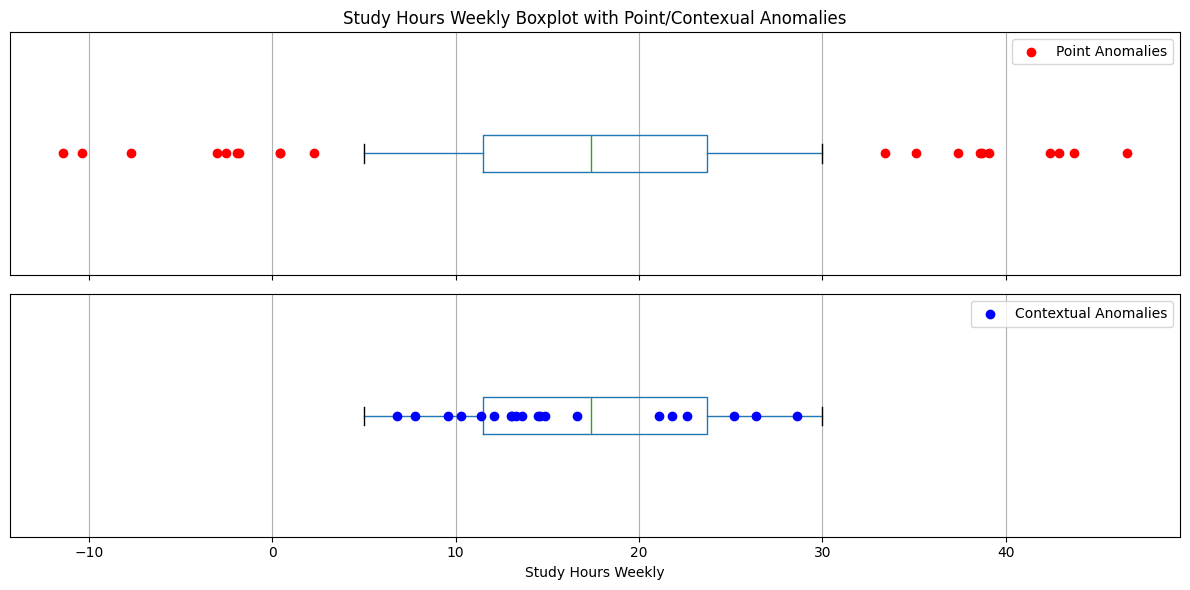

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

datasets = {
    'education_1_df': 'Datasets/student-grading.csv',
}

anomalous_datasets = {
    'a_education_1_df': 'Datasets/student-grading_anomaly.csv',
}

# Load data
df = pd.read_csv('Datasets/student-grading.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True)

true_set_point = run_inject(rows=1, point=0.1, contextual=0.000, nrows=5000)
df_a = pd.read_csv('Datasets/student-grading_anomaly.csv')
stw_point = [item for sublist in true_set_point for item in sublist if item[1] == 'Study_Hours_per_Week']
highlight_point = [df_a.loc[idx, 'Study_Hours_per_Week'] for idx, _ in stw_point[:20]]
print(highlight_point)

df[['Study_Hours_per_Week']].boxplot(vert=False, ax=axes[0])
axes[0].scatter(highlight_point, [1]*len(highlight_point), color='red', zorder=3, label='Point Anomalies')
axes[0].set_title('Study Hours Weekly Boxplot with Point/Contexual Anomalies')
axes[0].legend()
axes[0].set_yticks([])

df = pd.read_csv('Datasets/student-grading.csv')

true_set_contextual = run_inject(rows=1, point=0.000, contextual=0.1, nrows=5000)
df_a = pd.read_csv('Datasets/student-grading_anomaly.csv')
stw_contextual = [item for sublist in true_set_contextual for item in sublist if item[1] == 'Study_Hours_per_Week']
highlight_contextual = [df.loc[idx, 'Study_Hours_per_Week'] for idx, _ in stw_contextual[:20]]
print(highlight_contextual)

df[['Study_Hours_per_Week']].boxplot(vert=False, ax=axes[1])
axes[1].scatter(highlight_contextual, [1]*len(highlight_contextual), color='blue', zorder=3, label='Contextual Anomalies')
axes[1].legend()
axes[1].set_yticks([])

plt.xlabel('Study Hours Weekly')
plt.tight_layout()
plt.show()


In [201]:
#### Education 3 Dataset Results

# 1000 Data Entries
#run_everything(0.1, 0.4, 0.4, nu=0.961, eps=1.66, threshold=0.68, speed=i)
# 8 & 380 & 398 & 47.24 & 77.00 & 47.24
# 100 & 95.5 & 99.4 & 83.2 & 97.0
#run_everything(0.2, 0.4, 0.4, nu=0.918, eps=1.21, threshold=0.64, speed=i)
# 16 & 786 & 798 & 42.98 & 73.00 & 44.11
# 100 & 91.5 & 92.5 & 61.9 & 90.5
#run_everything(0.3, 0.4, 0.4, nu=0.869, eps=0.896, threshold=0.61, speed=i)
# 24 & 1191 & 1198 & 53.42 & 86.00 & 55.60
# 100 & 84.5 & 97.2 & 52.1 & 89.5

# 2000 Data Entries
#run_everything(0.1, 0.4, 0.4, nu=0.95, eps=1.37, threshold=0.665, speed=i)
# 8 & 808 & 798 & 42.23 & 70.50 & 40.99
# 100 & 95.8 & 97.9 & 81.1 & 97.0
#run_everything(0.2, 0.4, 0.4, nu=0.9, eps=0.895, threshold=0.63, speed=i)
# 16 & 1611 & 1598 & 50.31 & 79.75 & 49.30
# 100 & 93.2 & 99.3 & 67.2 & 94.0
#run_everything(0.3, 0.4, 0.4, nu=0.85, eps=0.61, threshold=0.605, speed=i)
# 24 & 2368 & 2398 & 54.30 & 85.83 & 56.41
# 100 & 85.8 & 95.9 & 52.1 & 87.3